# E-Commerce Shipping Data - Logistics
### Contexto e Objetivo

Este projeto tem como objetivo uma Análise Exploratória de Dados (EDA) para fornecer insights sobre o desempenho logístico de uma empresa. O conjunto de dados utilizado contém informações relacionadas à entrega de produtos aos clientes. O foco desta análise é identificar padrões e tendências que possa ajudar a otimizar os processos de entrega e melhorar a satisfação do cliente.

### Conjunto de Dados

O conjunto de dados foi retirado do Kaggle, disponível em [E-Commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics/data). Ele contém os seguintes campos:

* id: Identificação única dos clientes.
* warehouse_block: Bloco do armazém onde o produto está armazenado.
* mode_of_shipment: Modo de envio (navio, avião ou rodoviário).
* customer_care_calls: Número de chamadas feitas ao atendimento ao cliente.
* customer_rating: Classificação do cliente (1 = pior, 5 = melhor).
* cost_of_the_product: Custo do produto em dólares.
* prior_purchases: Número de compras anteriores.
* priority: Prioridade do produto (baixa, média ou alta).
* gender: Gênero do cliente (Masculino ou Feminino).
* discount_offered: Desconto oferecido no produto.
* weight_in_grams: Peso do produto em gramas.
* exceeded_deadline: Informa se o prazo de entrega do produto foi excedido, onde TRUE (1) indica que chegou atrasado, e FALSE (0) indica que chegou no prazo.


In [806]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [807]:
# Carregando a base de dados
df = pd.read_csv('database/train.csv')

# Remover espaços dos nomes das colunas e deixar em minúsculo
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Renomear as colunas
df.rename(columns={'reached.on.time_y.n': 'exceeded_deadline'}, inplace=True)
df.rename(columns={'product_importance': 'priority'}, inplace=True)

# Converter os Tipos de Dados
# int para float
df['cost_of_the_product'] = df['cost_of_the_product'].astype('float')
df['discount_offered'] = df['discount_offered'].astype('float')
df['weight_in_gms'] = df['weight_in_gms'].astype('float')

# object para category
df['warehouse_block'] = df['warehouse_block'].astype('category')
df['mode_of_shipment'] = df['mode_of_shipment'].astype('category')
df['priority'] = df['priority'].astype('category')
df['gender'] = df['gender'].astype('category')

# Converter a variável binária  para booleano
df['exceeded_deadline'] = df['exceeded_deadline'].astype('bool')


# Visualizar as primeiras linhas
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,priority,gender,discount_offered,weight_in_gms,exceeded_deadline
0,1,D,Flight,4,2,177.0,3,low,F,44.0,1233.0,True
1,2,F,Flight,4,5,216.0,2,low,M,59.0,3088.0,True
2,3,A,Flight,2,2,183.0,4,low,M,48.0,3374.0,True
3,4,B,Flight,3,3,176.0,4,medium,M,10.0,1177.0,True
4,5,C,Flight,2,2,184.0,3,medium,F,46.0,2484.0,True


In [808]:
# Examinar a estrutura 
df.info()

# Descrição dos dados
df.describe()

# Verificar se existe valores ausentes nas colunas
# df.isnull().sum()

# Verifica se existem linhas duplicadas
# df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10999 non-null  int64   
 1   warehouse_block      10999 non-null  category
 2   mode_of_shipment     10999 non-null  category
 3   customer_care_calls  10999 non-null  int64   
 4   customer_rating      10999 non-null  int64   
 5   cost_of_the_product  10999 non-null  float64 
 6   prior_purchases      10999 non-null  int64   
 7   priority             10999 non-null  category
 8   gender               10999 non-null  category
 9   discount_offered     10999 non-null  float64 
 10  weight_in_gms        10999 non-null  float64 
 11  exceeded_deadline    10999 non-null  bool    
dtypes: bool(1), category(4), float64(3), int64(4)
memory usage: 655.9 KB


,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


## Análise Exploratória de Dados 

### 1) Distribuição de Produtos por Bloco de Armazém (Warehouse block)

warehouse_block
A    1833
B    1833
C    1833
D    1834
F    3666
dtype: int64


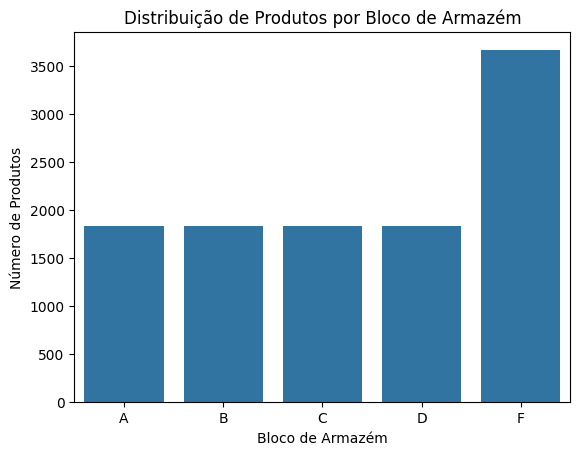

In [809]:
print(df.groupby('warehouse_block', observed=False).size())

sns.countplot(x='warehouse_block', data=df)
plt.title('Distribuição de Produtos por Bloco de Armazém')
plt.xlabel('Bloco de Armazém')
plt.ylabel('Número de Produtos')
plt.show()

**Insights:**

- O Bloco F contém o dobro de produtos em comparação aos outros blocos. Isso pode indicar um desequilíbrio na distribuição de mercadorias pelos blocos, o que pode gerar sobrecarga e ineficiências na logística desse bloco.

- Os blocos A, B, C e D têm quantidades muito similares de produtos, o que sugere uma distribuição balanceada nesses casos.

- Investigar o motivo do Bloco F estar tão mais carregado pode ser importante para evitar sobrecargas no processo de manuseio de mercadorias, além de possíveis impactos negativos nas entregas.

### 2) Proporção de produtos atrasados e entregues no prazo por bloco

                 Entregue no Prazo (False)  Atrasado (True)
warehouse_block                                            
A                                41.352973        58.647027
B                                39.770867        60.229133
C                                40.316421        59.683579
D                                40.239913        59.760087
F                                40.152755        59.847245


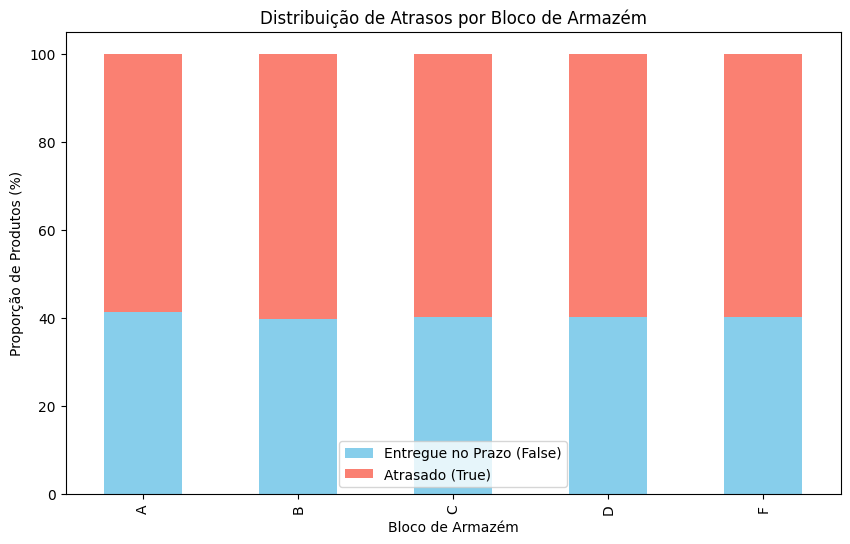

In [810]:
atrasos_por_bloco = df.groupby('warehouse_block', observed=False)['exceeded_deadline'].value_counts(normalize=True).unstack()

atrasos_por_bloco.columns = ['Entregue no Prazo (False)', 'Atrasado (True)'] # Renomear colunas para ficar mais claro
atrasos_por_bloco_porcentagem = atrasos_por_bloco * 100 # Multiplicar por 100 para ver a proporção em porcentagem

print(atrasos_por_bloco_porcentagem)

# Visualização no Gráfico
atrasos_por_bloco_porcentagem.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Distribuição de Atrasos por Bloco de Armazém')
plt.xlabel('Bloco de Armazém')
plt.ylabel('Proporção de Produtos (%)')
plt.legend(['Entregue no Prazo (False)', 'Atrasado (True)'])
plt.show()

**Insights Geral sobre os Atrasos:**

- A taxa de produtos com atraso (True) é elevada em todos os blocos, com variação entre 58% e 60%. Isso indica que a maioria dos produtos enfrentam atraso na entrega independentemente do bloco de armazém, o que sugere um problema na logística operacional. Pode ser uma combinação de fatores, como processos lentos, excesso de pedidos, ou até mesmo problemas no transporte.


**Análise por Bloco de Armazém:**

**Bloco A:**
- 41% dos produtos foram entregues no prazo, enquanto 59% sofreram atrasos.
- Esse bloco apresenta a **melhor taxa de pontualidade** entre os outros, mas ainda assim, quase 60% dos produtos estão atrasando.

**Bloco B:**
- 39,8% dos produtos foram entregues no prazo, enquanto 60,2% sofreram atrasos.
- Este bloco tem uma das **piores performances**, com o maior percentual de atrasos.

**Bloco C e D:**
- Ambos os blocos têm uma proporção de entrega no prazo de ~40%, e cerca de 60% de atrasos.
- Esses blocos estão muito próximos em desempenho, indicando que compartilham características logísticas ou problemas operacionais semelhantes .

**Bloco F:**
- 40,15% dos produtos foram entregues no prazo, enquanto 59,85% sofreram atrasos.
- Embora seja o bloco com **maior volume de produtos**, ele não é o pior em relação aos atrasos. Ainda assim, enfrenta problemas consideráveis, apresentando uma taxa de quase 60% de atrasos.

### 3) Distribuição dos Modos de Envio (Mode of shipment)

                  Volume  Porcentagem (%)
mode_of_shipment                         
Ship                7462        67.842531
Flight              1777        16.156014
Road                1760        16.001455


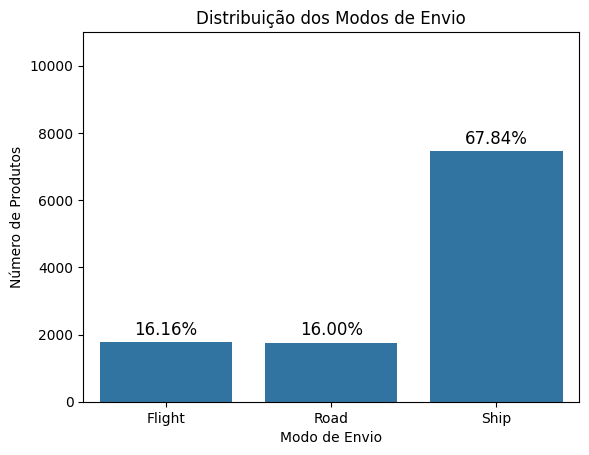

In [811]:
# 1) TABELA - Calcular a contagem e a porcentagem para cada modo de envio
contagem = df['mode_of_shipment'].value_counts()
porcentagem = df['mode_of_shipment'].value_counts(normalize=True) * 100

tabela_envio = pd.DataFrame({
    'Volume': contagem,
    'Porcentagem (%)': porcentagem
})

print(tabela_envio)

# 2 ) PLOTAR GRÁFICO

# Calcular a proporção de cada modo de envio
total = len(df)  # Total de linhas no DataFrame
ax = sns.countplot(x='mode_of_shipment', data=df)

# Mostrar porcentagem na barra
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

plt.title('Distribuição dos Modos de Envio')
plt.xlabel('Modo de Envio')
plt.ylabel('Número de Produtos')

ax.set_ylim(0, total)  # Mantém a escala proporcional aos dados

plt.show()

**Insights:**

- O transporte marítimo (Ship) é responsável por ~68% dos envios, o que é significativamente maior que os outros modos (Flight e Road).

- O transporte por avião (Flight) e por estrada (Road) têm números de envios similares, cada um são responsáveis por cerca de 16% dos produtos.

- A utilização predominante do transporte marítimo pode estar ligada a **custos operacionais**. O envio por navio é geralmente mais barato para grandes volumes, mas tem um tempo de entrega maior.

- A empresa pode estar priorizando a **eficiência de custos** em vez da velocidade de entrega. No entanto, caso os atrasos estejam prejudicando a satisfação do cliente, pode ser interessante reavaliar essa estratégia.

### 4) Análise Descritiva dos Atrasos por Modo de Envio

In [812]:
# VOLUME DE ATRASO POR MODO DE ENVIO
atrasos = df[df['exceeded_deadline'] == True]
qtd_atrasos_por_modo = atrasos['mode_of_shipment'].value_counts()

nao_atrasos = df[df['exceeded_deadline'] == False]
qtd_nao_atrasos_por_modo = nao_atrasos['mode_of_shipment'].value_counts()

total = qtd_atrasos_por_modo + qtd_nao_atrasos_por_modo

resultado = pd.DataFrame({
    'Com Atrasos': qtd_atrasos_por_modo,
    'Sem Atrasos': qtd_nao_atrasos_por_modo,
    'Total': total
}).fillna(0).astype(int)  # Preencher NaNs com 0 e garantir que os valores sejam inteiros

print(resultado)

                  Com Atrasos  Sem Atrasos  Total
mode_of_shipment                                 
Flight                   1069          708   1777
Road                     1035          725   1760
Ship                     4459         3003   7462


mode_of_shipment
Flight    60.157569
Road      58.806818
Ship      59.756098
Name: exceeded_deadline, dtype: float64


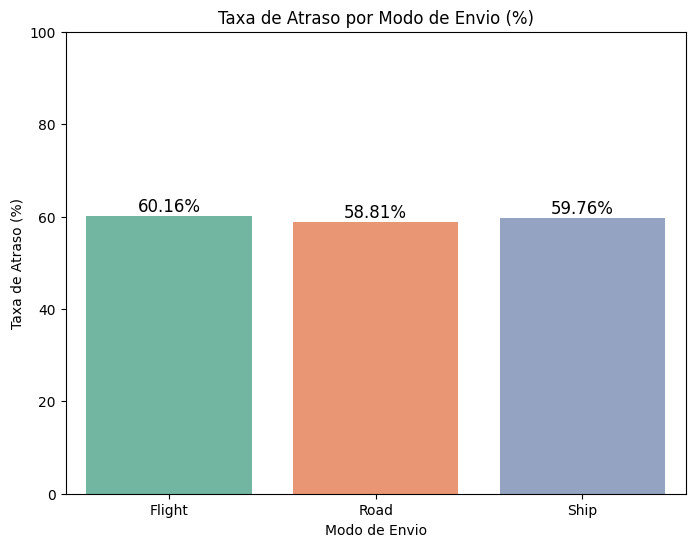

In [813]:
# PROPORÇÃO DE ATRASO POR MODO DE ENVIO
taxa_atraso_por_modo = df.groupby('mode_of_shipment', observed=False)['exceeded_deadline'].mean() * 100

print(taxa_atraso_por_modo)

plt.figure(figsize=(8, 6))
sns.barplot(x=taxa_atraso_por_modo.index, y=taxa_atraso_por_modo.values, palette='Set2', hue=taxa_atraso_por_modo.index, legend=False)

plt.title('Taxa de Atraso por Modo de Envio (%)')
plt.xlabel('Modo de Envio')
plt.ylabel('Taxa de Atraso (%)')
plt.ylim(0, 100)

# Mostrar os valores no topo das barras
for i in range(len(taxa_atraso_por_modo)):
    plt.text(i, taxa_atraso_por_modo.values[i] + 1, f'{taxa_atraso_por_modo.values[i]:.2f}%', ha='center', fontsize=12)

plt.show()


**Insight:**

- As proporções de atraso são bastante semelhantes entre os diferentes modos de envio, com uma variação de aproximadamente 2%. A diferença não é significativa o suficiente para considerar que um modo de envio é mais propenso a atrasos do que os outros, considerando que as diferenças são pequenas.

### 5) Impacto da Prioridade do Produto na Entrega

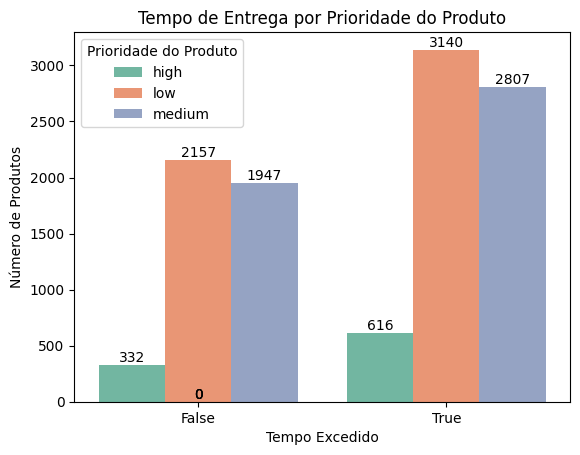

In [814]:
ax = sns.countplot(x='exceeded_deadline', palette='Set2', hue='priority', data=df)

plt.title('Tempo de Entrega por Prioridade do Produto')
plt.xlabel('Tempo Excedido')
plt.ylabel('Número de Produtos')
plt.legend(title='Prioridade do Produto')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.001 * height, f'{int(height)}', ha='center', va='bottom')


In [815]:
# Calcular taxa de atraso por prioridade 
total_por_prioridade = df['priority'].value_counts()
print('Quantidade total de produtos por prioridade:\n')
print(total_por_prioridade)

atrasos_por_prioridade = df[df['exceeded_deadline'] == True]['priority'].value_counts()
print('\nQuantidade de produtos atrasados (TRUE) por prioridade:\n')
print(atrasos_por_prioridade)

taxa_atraso_por_prioridade = (atrasos_por_prioridade / total_por_prioridade) * 100
print('\nTaxa de atraso por prioridade (quantidade de atrasos / quantidade total de produtos):\n')
print(taxa_atraso_por_prioridade)

Quantidade total de produtos por prioridade:

priority
low       5297
medium    4754
high       948
Name: count, dtype: int64

Quantidade de produtos atrasados (TRUE) por prioridade:

priority
low       3140
medium    2807
high       616
Name: count, dtype: int64

Taxa de atraso por prioridade (quantidade de atrasos / quantidade total de produtos):

priority
low       59.278837
medium    59.045015
high      64.978903
Name: count, dtype: float64


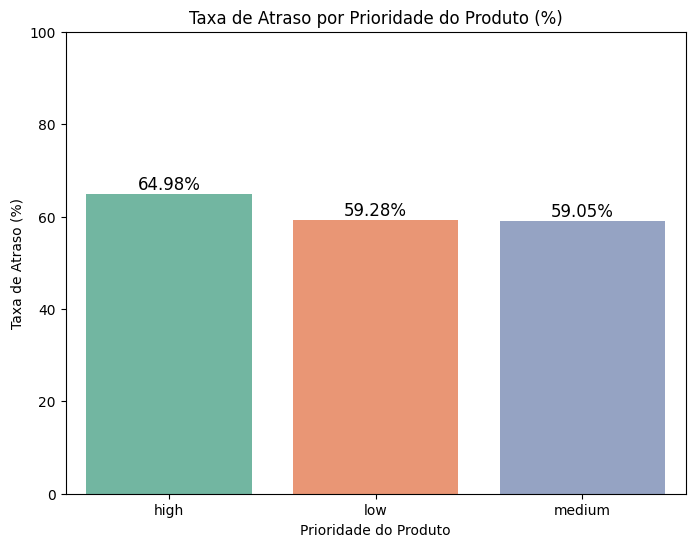

In [816]:
taxa_atraso_por_prioridade = taxa_atraso_por_prioridade.sort_index() # Ordenar por índice para garantir os valores corretos sobre a barra

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=taxa_atraso_por_prioridade.index, y=taxa_atraso_por_prioridade.values, palette='Set2', hue=taxa_atraso_por_prioridade.index)

plt.title('Taxa de Atraso por Prioridade do Produto (%)')
plt.xlabel('Prioridade do Produto')
plt.ylabel('Taxa de Atraso (%)')
plt.ylim(0, 100)

for i, value in enumerate(taxa_atraso_por_prioridade):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

plt.show()

**Insights:**

- Embora produtos com prioridade "alta" sejam mais importantes, eles apresentam a maior taxa de atraso em comparação com os produtos das outras prioridades. Isso pode indicar um possível gargalo logístico ou uma falha na priorização desses itens.

- A logística da empresa, em termos gerais, enfrenta um problema com entregas pontuais, independentemente da prioridade do produto. O maior desafio é com produtos de alta prioridade, onde os atrasos podem causar impacto significativo para os clientes e para o negócio. 

-  Uma revisão dos processos logísticos e priorização pode ser necessária, principalmente para produtos de alta prioridade, visando melhorar a eficiência e atender melhor às expectativas dos clientes.

### 6) Distribuição dos Custos dos Produtos

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: cost_of_the_product, dtype: float64


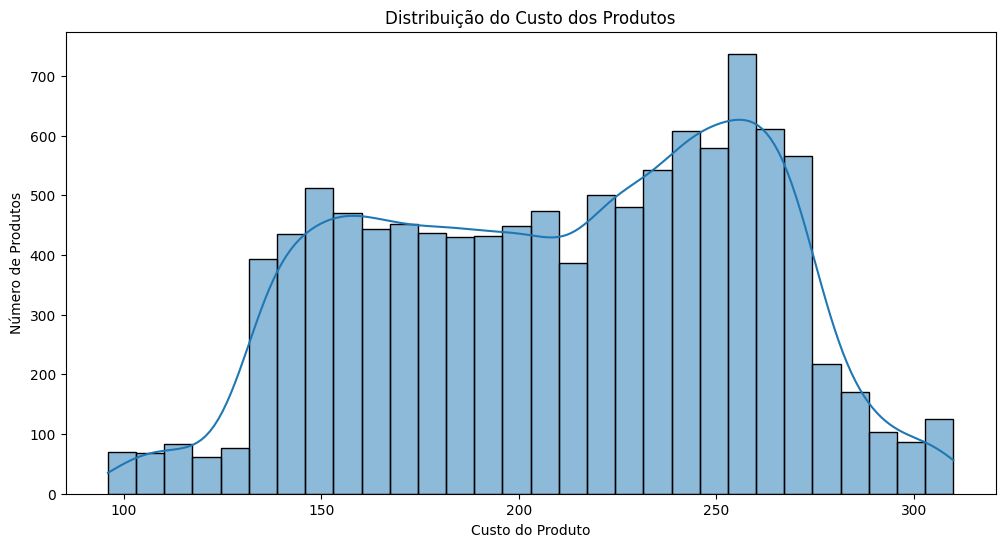

In [817]:
# Análise descritiva
custo_descritivo = df['cost_of_the_product'].describe()
print(custo_descritivo)

# Histograma da distribuição de custo
plt.figure(figsize=(12, 6))
sns.histplot(df['cost_of_the_product'], bins=30, kde=True)
plt.title('Distribuição do Custo dos Produtos')
plt.xlabel('Custo do Produto')
plt.ylabel('Número de Produtos')
plt.show()

cost_of_the_product
100-150    1465
151-200    3156
201-250    3560
251-300    2778
Name: count, dtype: int64


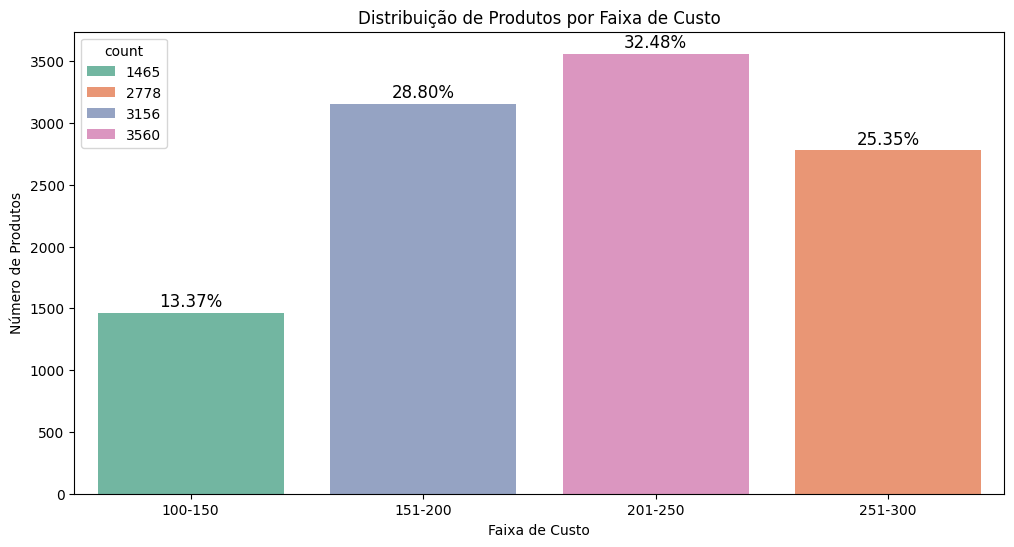

In [818]:
# Distribuição por faixas de custo
faixas_custo = pd.cut(df['cost_of_the_product'], bins=[100, 150, 200, 250, df['cost_of_the_product'].max()], 
                      labels=['100-150', '151-200', '201-250', '251-300'])

distribuicao_faixa = faixas_custo.value_counts().sort_index() # Contar o número de produtos em cada faixa
print(distribuicao_faixa)

# Calcular porcentagens
total_produtos = distribuicao_faixa.sum()
percentuais_faixa = (distribuicao_faixa / total_produtos) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=distribuicao_faixa.index, y=distribuicao_faixa.values, palette='Set2', hue=distribuicao_faixa)

plt.title('Distribuição de Produtos por Faixa de Custo')
plt.xlabel('Faixa de Custo')
plt.ylabel('Número de Produtos')

# Adicionar porcentagens no topo das barras
for i, value in enumerate(distribuicao_faixa.values):
    percentage = percentuais_faixa.iloc[i]  # Acessa a porcentagem pela posição
    ax.text(i, value + 50, f'{percentage:.2f}%', ha='center', fontsize=12)

plt.show()

**Resumos das Estatísticas Descritivas:**
- **Quantidade**: 10.999 produtos foram analisados.
- **Média:** O custo médio dos produtos é aproximadamente $210.20.
- **Desvio Padrão:** A variação nos preços é de cerca de $48.06, indicando que há uma dispersão considerável nos custos.
- **Valores Mínimo e Máximo:** Os preços dos produtos variam de $96 a $310. A faixa de custo mínima observada (96) está ligeiramente abaixo do intervalo definido, indicando possíveis erros de entrada ou variações menores.
- **25º Percentil:** $169
- **Mediana (50º Percentil):** $214
- **75º Percentil:** $251

**Insights:**

- A maioria dos produtos (cerca de 61%) está em faixas de custo entre $151 e $250. Isso sugere que a empresa oferece uma gama de produtos com preços moderados a altos.

- A faixa de custo entre $201 e $250 é a mais significativa, representando aproximadamente 32.5% dos produtos. Esta faixa está levemente acima da mediana, indicando que a maioria dos produtos está acima do custo mediano.

### 7) Custo médio por variáveis

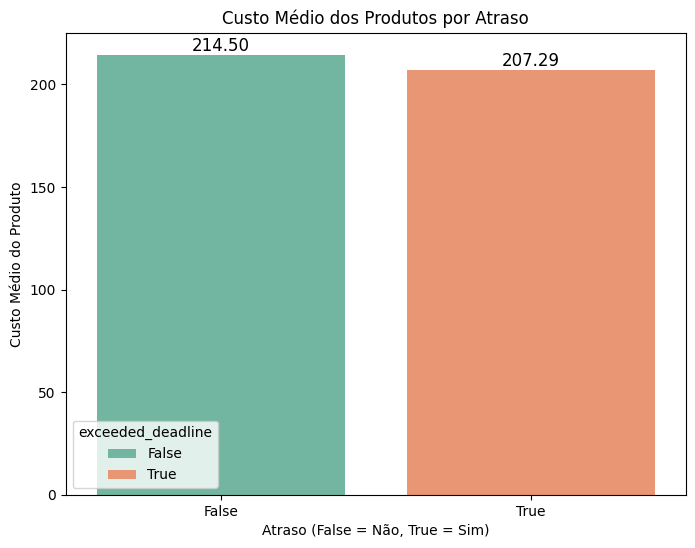

In [819]:
# Custo médio por atraso
custo_medio_atraso = df.groupby('exceeded_deadline', observed=False)['cost_of_the_product'].mean()

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=custo_medio_atraso.index, y=custo_medio_atraso.values, palette='Set2', hue=custo_medio_atraso.index)
plt.title('Custo Médio dos Produtos por Atraso')
plt.xlabel('Atraso (False = Não, True = Sim)')
plt.ylabel('Custo Médio do Produto')

for i, value in enumerate(custo_medio_atraso.values):
    ax.text(i, value + 2, f'{value:.2f}', ha='center', fontsize=12)

plt.show()


**Insights - Custo Médio por Atraso:**

- O custo médio dos produtos que chegam a tempo é levemente superior ao custo médio dos produtos que sofrem atrasos. Isso pode indicar que produtos mais caros têm uma tendência menor de atrasar, ou que os produtos de menor custo enfrentam maiores desafios logísticos.

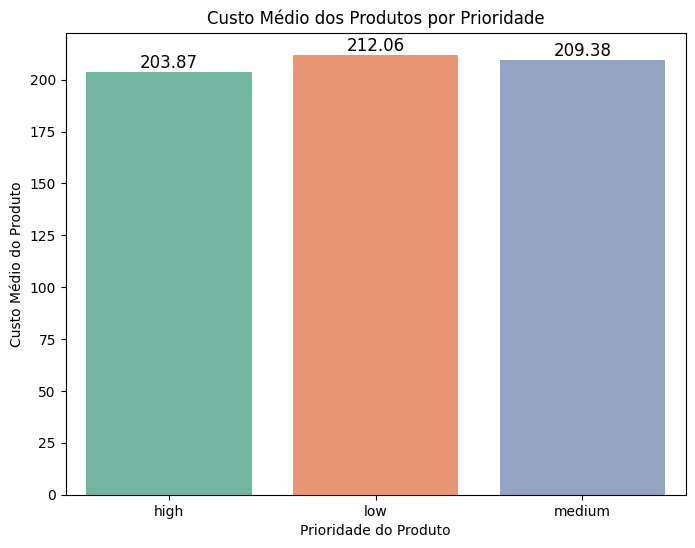

In [820]:
# Custo médio por prioridade
custo_medio_prioridade = df.groupby('priority', observed=False)['cost_of_the_product'].mean()
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=custo_medio_prioridade.index, y=custo_medio_prioridade.values, palette='Set2', hue=custo_medio_prioridade.index)
plt.title('Custo Médio dos Produtos por Prioridade')
plt.xlabel('Prioridade do Produto')
plt.ylabel('Custo Médio do Produto')

for i, value in enumerate(custo_medio_prioridade.values):
    ax.text(i, value + 2, f'{value:.2f}', ha='center', fontsize=12)

plt.show()

**Insights - Custo Médio por Prioridade:**

- Produtos de alta prioridade têm um custo médio inferior comparado aos de baixa prioridade e média prioridade. Isso pode sugerir que estratégias específicas são aplicadas para manter o custo mais baixo.


### 8) Distribuição das Avaliações dos Clientes

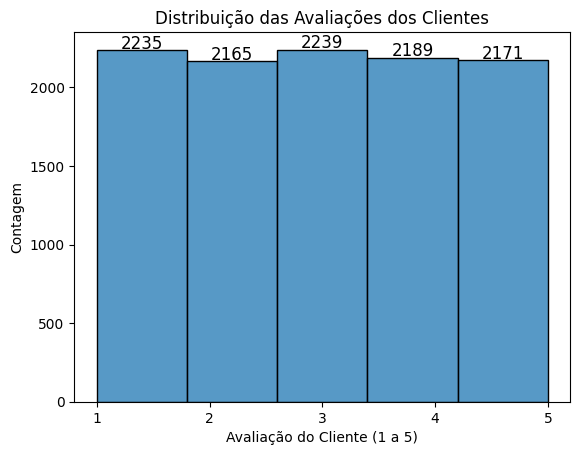

In [821]:
# print(df.groupby('customer_rating').size())

ax = sns.histplot(df['customer_rating'], bins=5, kde=False)

plt.title('Distribuição das Avaliações dos Clientes')
plt.xlabel('Avaliação do Cliente (1 a 5)')
plt.ylabel('Contagem')

# Definir os ticks do eixo x para serem apenas os valores de 1 a 5
ax.set_xticks([1, 2, 3, 4, 5])

# Adicionar os valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{int(height)}', ha='center', fontsize=12)

plt.show()

**Insights:**

- As avaliações dos clientes estão bastante equilibradas entre 1 e 5, com apenas pequenas variações no número de avaliações de cada nota.Isso indica que a experiência dos clientes é variada e não está fortemente inclinada para um lado específico.

- A nota mediana (3) sugere uma experiência neutra para muitos clientes, apontando uma oportunidade de transformar essa neutralidade em satisfação.

- Melhorar a experiência do cliente pode transformar as notas medianas em notas mais altas e reduzir as avaliações baixas.

### 9) Relação das Avaliações com os Atrasos da Entrega

In [822]:
contingency_table = pd.crosstab(df['customer_rating'], df['exceeded_deadline'])
print('Relação da avaliação com os atrasos da entrega:\n')
print(contingency_table)

proporcao_atrasos = contingency_table[True] / contingency_table.sum(axis=1) * 100
print('\nProporção de atrasos por nota:\n')
print(proporcao_atrasos)

Relação da avaliação com os atrasos da entrega:

exceeded_deadline  False  True 
customer_rating                
1                    922   1313
2                    892   1273
3                    882   1357
4                    886   1303
5                    854   1317

Proporção de atrasos por nota:

customer_rating
1    58.747204
2    58.799076
3    60.607414
4    59.524897
5    60.663289
dtype: float64


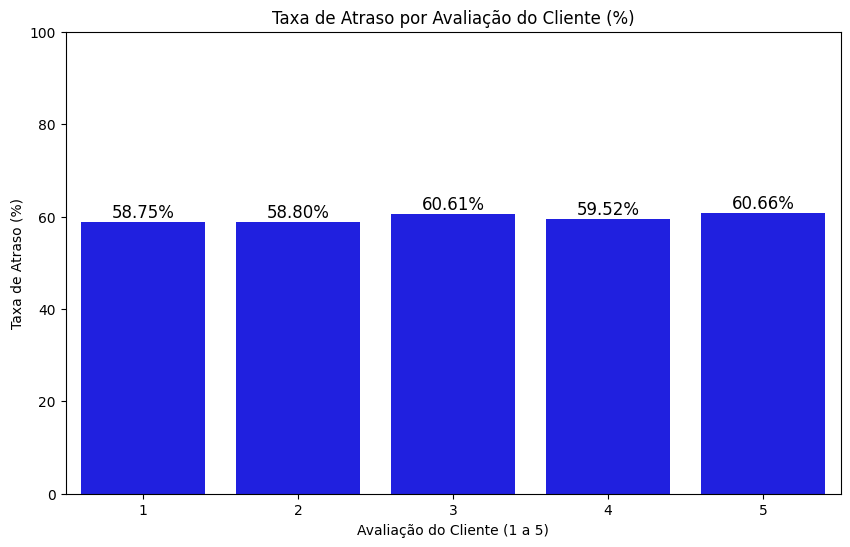

In [823]:
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao_atrasos.index, y=proporcao_atrasos.values, color='blue')

plt.title('Taxa de Atraso por Avaliação do Cliente (%)')
plt.xlabel('Avaliação do Cliente (1 a 5)')
plt.ylabel('Taxa de Atraso (%)')
plt.ylim(0, 100)

for i, value in enumerate(proporcao_atrasos):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

plt.show()

**Insights:**

- A taxa de atraso é relativamente alta e consistente entre as diferentes notas de avaliação. Isso pode indicar que tanto os clientes que estão extremamente insatisfeitos quanto os que estão extremamente satisfeitos experienciam um número considerável de atrasos. Mesmo os clientes que avaliam com as notas mais altas (5) têm uma taxa de atraso comparável à dos clientes que avaliam com notas mais baixas (1).

- Melhorar a pontualidade das entregas pode ter um impacto positivo geral na satisfação do cliente, ajudando a transformar avaliações medianas em positivas e reduzir a insatisfação associada aos atrasos.

### 10) Distribuição do Peso dos Produtos por Prazo de Entrega

In [824]:
# Análise descritiva
print(df['weight_in_gms'].describe())

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: weight_in_gms, dtype: float64


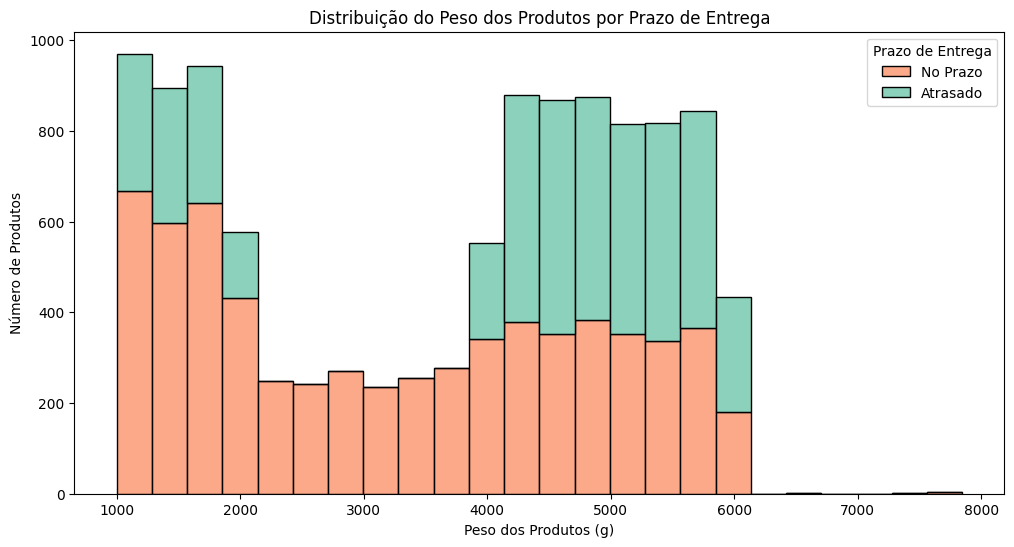

In [825]:
# Distribuição do Peso dos Produtos por Prazo de Entrega
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='weight_in_gms', hue='exceeded_deadline', multiple='stack', palette='Set2')

plt.title('Distribuição do Peso dos Produtos por Prazo de Entrega')
plt.xlabel('Peso dos Produtos (g)')
plt.ylabel('Número de Produtos')
plt.legend(title='Prazo de Entrega', labels=['No Prazo', 'Atrasado'])

plt.show()

exceeded_deadline  False  True 
faixa_peso                     
1000-2000           1046   2199
2001-3000              0    899
3001-4000              1    888
4001-5000           1733   1344
5001-6000           1656   1225
6001-7000              0      3
7000+                  0      5


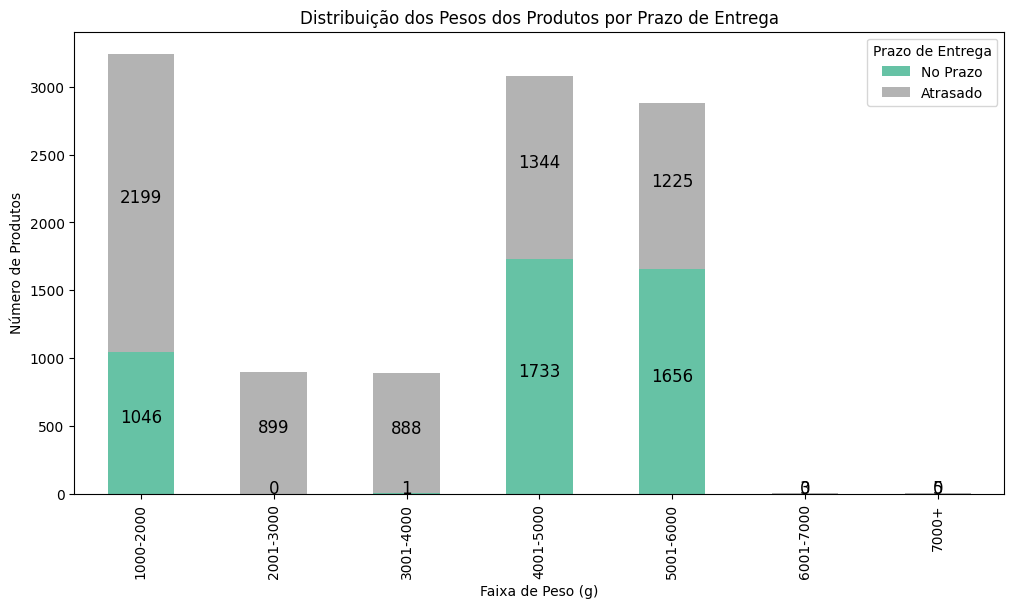

In [826]:
# Distribuição do Peso dos Produtos por Prazo de Entrega (Faixa de Peso)

faixas_peso = pd.cut(df['weight_in_gms'], bins=[1000, 2000, 3000, 4000, 5000, 6000, 7000, df['weight_in_gms'].max()],
                     labels=['1000-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7000+'])

df['faixa_peso'] = faixas_peso # Adicionando a faixa de peso ao DataFrame

# Contagem de produtos por faixa de peso e prazo de entrega
distribuicao_peso_prazo = df.groupby(['faixa_peso', 'exceeded_deadline'], observed=False).size().unstack().fillna(0)
print(distribuicao_peso_prazo)

distribuicao_peso_prazo.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))

# Adicionando os valores nas barras
for i, (index, row) in enumerate(distribuicao_peso_prazo.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, row[:j+1].sum() - (value / 2), f'{value:.0f}', ha='center', fontsize=12)

plt.title('Distribuição dos Pesos dos Produtos por Prazo de Entrega')
plt.xlabel('Faixa de Peso (g)')
plt.ylabel('Número de Produtos')
plt.legend(title='Prazo de Entrega', labels=['No Prazo', 'Atrasado'])
plt.show()

**Insights**
- Produtos na faixa de peso de 1000-2000 g têm a maior quantidade de atrasos comparado com outros intervalos de peso. Isso pode sugerir que, embora essa faixa de peso seja a mais comum, os atrasos são mais frequentes.

- As faixas de peso maiores, como 6001-7000 g e 7000+ g, têm muito poucos produtos e ainda menos atrasos.

- As faixas de peso intermediárias (2001-3000 g e 3001-4000 g) têm uma quantidade considerável de atrasos em comparação com o número muito baixo de produtos entregues no prazo. Isso pode indicar desafios específicos para essas faixas de peso, possivelmente relacionados ao manuseio ou logística.

### 11) Distribuição de Produtos por Faixa de Peso

weight_in_gms
1000-2000    3245
2001-3000     899
3001-4000     889
4001-5000    3077
5001-6000    2881
6001-7000       3
7000+           5
Name: count, dtype: int64


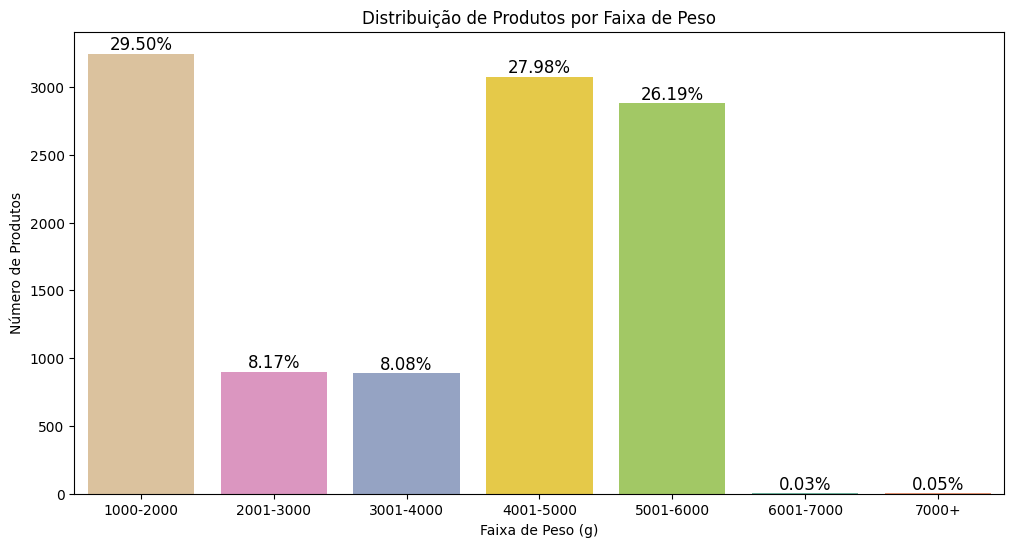

In [827]:
faixas_peso = pd.cut(df['weight_in_gms'], bins=[1000, 2000, 3000, 4000, 5000, 6000, 7000, df['weight_in_gms'].max()],
                     labels=['1000-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7000+'])

distribuicao_faixa_peso = faixas_peso.value_counts().sort_index()
print(distribuicao_faixa_peso)

plt.figure(figsize=(12, 6))
sns.barplot(x=distribuicao_faixa_peso.index, y=distribuicao_faixa_peso.values, palette='Set2', hue=distribuicao_faixa_peso, legend=False)

percentuais_faixa_peso = distribuicao_faixa_peso / distribuicao_faixa_peso.sum() * 100
for i, (index, value) in enumerate(distribuicao_faixa_peso.items()):
    plt.text(i, value + 30, f'{percentuais_faixa_peso.iloc[i]:.2f}%', ha='center', fontsize=12)

plt.title('Distribuição de Produtos por Faixa de Peso')
plt.xlabel('Faixa de Peso (g)')
plt.ylabel('Número de Produtos')
plt.show()

**Insights**
- A maioria dos produtos está nas faixas de peso mais baixas ou intermediária (1000-2000 g e 4001-5000 g), representando quase 74% do total. Isso sugere que a empresa lida predominantemente com produtos mais leves ou de peso intermediário.

- As faixas de peso superiores (6001-7000 g e 7000+ g) têm uma presença muito pequena, indicando que esses produtos são raros ou não representam uma grande parte do estoque da empresa.

### 12)  Relação entre Desconto Oferecido e Avaliação do Cliente

In [828]:
# 1. Análise Descritiva
print(df.groupby('customer_rating')['discount_offered'].describe())

                  count       mean        std  min  25%  50%   75%   max
customer_rating                                                         
1                2235.0  13.458166  16.330281  1.0  4.0  7.0  10.0  65.0
2                2165.0  13.687760  16.418101  1.0  4.0  7.0  11.0  65.0
3                2239.0  12.979902  16.059709  1.0  4.0  7.0  10.0  65.0
4                2189.0  13.257195  15.967864  1.0  4.0  7.0  10.0  65.0
5                2171.0  13.494703  16.256593  1.0  4.0  7.0  10.0  65.0


In [829]:
# Distribuição com mais faixas mais dispersas:

faixas_desconto = pd.cut(df['discount_offered'], 
                         bins=[0, 5, 10, 20, 30, 40, 50, 60, df['discount_offered'].max()], 
                         labels=['0-5%', '6-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '60%+'])

df['faixa_desconto'] = faixas_desconto

distribuicao_avaliacoes = df.groupby(['faixa_desconto', 'customer_rating'], observed=False).size().unstack().fillna(0)
print(distribuicao_avaliacoes)

customer_rating    1    2    3    4    5
faixa_desconto                          
0-5%             857  798  880  800  822
6-10%            846  823  843  870  813
11-20%            86  102  101  110   97
21-30%            94  101   93   65   88
31-40%           102   91   75   98  104
41-50%            99  103   94   99  112
51-60%            97   97  102  113   90
60%+              54   50   51   34   45


customer_rating     1    2    3    4    5
discount_offered                         
0-5%              857  798  880  800  822
6-10%             846  823  843  870  813
11%+              532  544  516  519  536


<Figure size 1000x600 with 0 Axes>

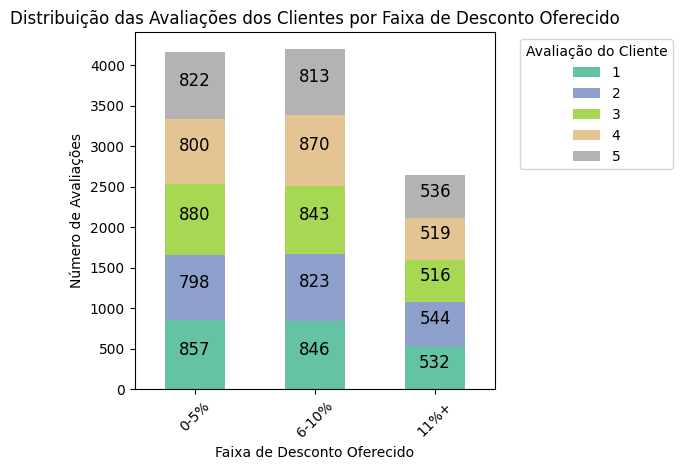

In [830]:
# Distribuição com as faixas mais filtradas - novas faixas de desconto
faixas_desconto = pd.cut(df['discount_offered'], bins=[0, 5, 10, df['discount_offered'].max()],
                         labels=['0-5%', '6-10%', '11%+'])

distribuicao_avaliacoes = df.groupby([faixas_desconto, 'customer_rating'], observed=False).size().unstack().fillna(0)
print(distribuicao_avaliacoes)

plt.figure(figsize=(10, 6))
distribuicao_avaliacoes.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Distribuição das Avaliações dos Clientes por Faixa de Desconto Oferecido')
plt.xlabel('Faixa de Desconto Oferecido')
plt.ylabel('Número de Avaliações')
plt.legend(title='Avaliação do Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

for i, (index, row) in enumerate(distribuicao_avaliacoes.iterrows()):
    for j, value in enumerate(row):
        if value > 0:  # Evita mostrar valores em barras com valor zero
            plt.text(i, row[:j+1].sum() - (value / 2), f'{int(value)}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**Insights**
- Descontos entre 0-10% parecem ser o padrão na maioria das transações e não afetam substancialmente a avaliação dos clientes. No entanto, o aumento dos descontos acima de 11% não garante uma melhoria nas avaliações e resulta em uma distribuição mais dispersa, sugerindo que grandes descontos não necessariamente geram uma experiência de cliente significativamente melhor.